In [1]:
from openslide import OpenSlide
import scipy
import heapq
import numpy as np
import skimage as ski
from skimage.color import rgb2hed, hed2rgb
import matplotlib.pyplot as plt
import os, sys
import math
import csv
from matplotlib_scalebar.scalebar import ScaleBar
import cv2
from PIL import Image

In [2]:
img_path = r"D:\Image Files\Naa10 x Naa12 Brains"
keyWord = "ndpi"
img_files = [os.path.join(img_path, img_file) for img_file in os.listdir(img_path) if keyWord.lower() in img_file.lower()]
print(img_files)

['D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_001_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_002_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_003_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_004_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_006_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_007_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_008_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_014_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_015_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_022_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_023_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_027_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_028_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_031_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_032_B1_HE.ndpi', 'D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_033_B1_HE.ndpi', 'D:\\Im

In [3]:
img_current = img_files[1]
print(img_current)

D:\Image Files\Naa10 x Naa12 Brains\GL25_002_B1_HE.ndpi


In [4]:
img_slide = OpenSlide(img_current)

In [5]:
?img_slide

Type:           OpenSlide
String form:    OpenSlide('D:\\Image Files\\Naa10 x Naa12 Brains\\GL25_002_B1_HE.ndpi')
File:           c:\users\savile\appdata\local\miniforge3\envs\gpu-image-processing\lib\site-packages\openslide\__init__.py
Docstring:     
An open whole-slide image.

close() is called automatically when the object is deleted.
The object may be used as a context manager, in which case it will be
closed upon exiting the context.

If an operation fails, OpenSlideError is raised.  Note that OpenSlide
has latching error semantics: once OpenSlideError is raised, all future
operations on the OpenSlide object, other than close(), will fail.
Init docstring: Open a whole-slide image.

In [6]:
location = (0, 0)
level = img_slide.level_count-1
# size = (80, img_slide.level_dimensions[level][1])
size = img_slide.level_dimensions[level]
print(size)
region = img_slide.read_region(location, level, size)
# ?region

(780, 187)


In [7]:
np_region = np.asarray(region)
np_rgb = np_region[:, :, :3]
np_gray = ski.color.rgb2gray(np_rgb)
print(np_gray.shape)
print(np_gray.dtype)
print(np_gray)

(187, 780)
float64
[[0.91088235 0.91480392 0.91480392 ... 0.91480392 0.91480392 0.91480392]
 [0.91480392 0.91480392 0.91480392 ... 0.91480392 0.91480392 0.91480392]
 [0.91480392 0.91480392 0.91480392 ... 0.91480392 0.91480392 0.91480392]
 ...
 [0.91480392 0.91480392 0.91480392 ... 0.91088235 0.91088235 0.91088235]
 [0.91480392 0.91480392 0.91480392 ... 0.91088235 0.91088235 0.91088235]
 [0.91480392 0.91480392 0.91480392 ... 0.91088235 0.91088235 0.91088235]]


In [9]:
threshold_value = 200/255
print(threshold_value)
np_gray_mask = np.where(np_gray < threshold_value, 1, 0).astype(np.float64)
np_gray_mask = np_gray*np_gray_mask

0.7843137254901961


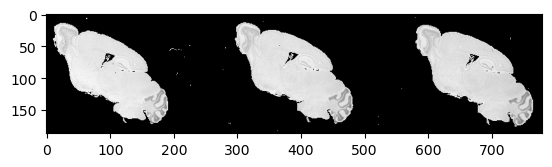

In [10]:
fig, ax = plt.subplots()
ax.imshow(np_gray_mask, cmap='gray')#, cmap='Greys')
plt.show()

In [11]:
contours = ski.measure.find_contours(np_gray_mask)
# print(contours)

def calculate_contour_area(contour):
    x = contour[:, 1]  # X-coordinates
    y = contour[:, 0]  # Y-coordinates
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Calculate areas for all contours
areas = [calculate_contour_area(contour) for contour in contours]
# areas.sort(reverse=True)
largest_indices = heapq.nlargest(3, range(len(areas)), key=lambda i: areas[i])
# print(largest_indices)

# Print areas
# for i, area in enumerate(areas):
#     print(f"Contour {i + 1}: Area = {area}")

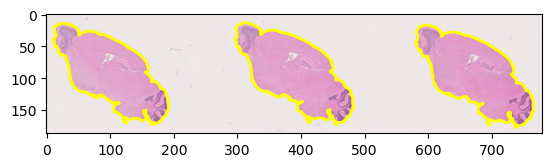

In [12]:
fig, ax = plt.subplots()
ax.imshow(np_rgb)

for index in largest_indices:
    ax.plot(contours[index][:, 1], contours[index][:, 0], linewidth=2, color='yellow')

plt.show()
# print(contours)

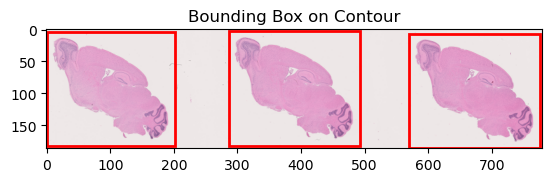

In [13]:
coordinates = []
# Display the bounding box on the image
fig, ax = plt.subplots()
ax.imshow(np_rgb)
for index in largest_indices:
    # Calculate the bounding box
    x_min, x_max = np.min(contours[index][:, 1])-10, np.max(contours[index][:, 1])+10
    y_min, y_max = np.min(contours[index][:, 0])-10, np.max(contours[index][:, 0])+10
    # ax.plot(contours[index][:, 1], contours[index][:, 0], linewidth=2, color='yellow')
    location = (x_min, y_min)
    size = (x_max-x_min, y_max-y_min)
    coordinates.append([location, size])
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                     linewidth=2, edgecolor='red', facecolor='none')  # Bounding box
    ax.add_patch(rect)
    
ax.set_title('Bounding Box on Contour')
plt.show()

In [14]:
#Scale bounding boxes up to original image, crop hearts, save
downsample_factor = img_slide.level_downsamples[level]
higher_bounding_boxes = []

for box in coordinates:
    bigger_box = []
    for coord in box:
        new_box = (int(downsample_factor*coord[0]), int(downsample_factor*coord[1]))
        bigger_box.append(new_box)
    higher_bounding_boxes.append(bigger_box)

print(len(higher_bounding_boxes))

3


In [15]:
highest_region = img_slide.read_region(higher_bounding_boxes[0][0], 0, higher_bounding_boxes[0][1])
np_region = np.asarray(highest_region)
np_rgb = np_region[:, :, :3]

print(np_rgb.shape)

(23037, 26361, 3)


In [16]:
ihc_rgb = np_rgb
# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)

In [17]:
# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))

# ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

In [20]:
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))

In [21]:
img = Image.fromarray((ihc_e * 255).astype(np.uint8))
img.save("Brain Eosin PIL.png")

In [ ]:
fig, ax = plt.subplots()
ax.axis('off')
plt.imshow(ihc_e)
plt.savefig("Brain Eosin - 600.png", dpi=600)
plt.close()

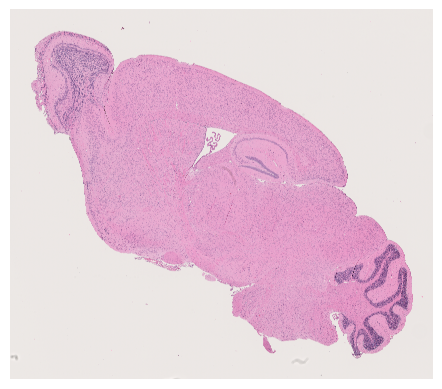

In [116]:
fig, ax = plt.subplots()
ax.axis('off')
plt.imshow(np_rgb)
plt.savefig("Brain Test - 2.png", dpi=600)

plt.show()

In [18]:
plt.close('all')

In [26]:
# Threshold red color
img_hsv = ski.color.rgb2hsv(np_rgb)

In [48]:
lower1 = np.array([0, 25/255, 20/255])
lower2 = np.array([300/360, 25/255, 20/255])

upper1 = np.array([10/360, 1, 1])
upper2 = np.array([1, 1, 1])

mask1 = np.all((img_hsv >= lower1) & (img_hsv <= upper1), axis=-1)
mask2 = np.all((img_hsv >= lower2) & (img_hsv <= upper2), axis=-1)

img_red = np_rgb * mask1[:, :, np.newaxis] + np_rgb *mask2[:, :, np.newaxis]

black_pixels = (img_red[:, :, 0] == 0) & (img_red[:, :, 1] == 0) & (img_red[:, :, 2] == 0)
img_red[black_pixels] = [255, 255, 255]

In [49]:
lower_hue = 0.5 #121/255
lower_sat = 25/255 #20/255
lower_bri = 20/255 #10/255

upper_hue = 0.7 #179/255
upper_sat = 1
upper_bri = 1

lower_bound = np.array([lower_hue, lower_sat, lower_bri])
upper_bound = np.array([upper_hue, upper_sat, upper_bri])

img_mask = np.all((img_hsv >= lower_bound) & (img_hsv <= upper_bound), axis=-1)
img_blue = np_rgb * img_mask[:, :, np.newaxis]

black_pixels = (img_blue[:, :, 0] == 0) & (img_blue[:, :, 1] == 0) & (img_blue[:, :, 2] == 0)
img_blue[black_pixels] = [255, 255, 255]
# binary_mask = np.zeros_like(np_rgb[:, :, 0])
# binary_mask[img_mask] = 255

In [19]:
print(img_mask.shape)
print(binary_mask.shape)

(11467, 11073)
(11467, 11073)


File Saved!


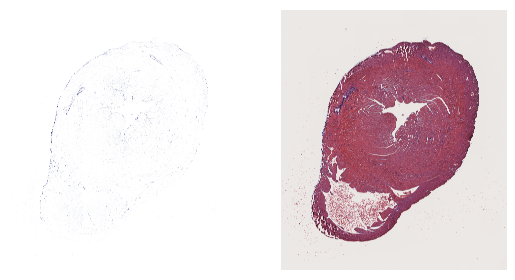

In [50]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img_blue)#, cmap='gray')
ax[1].imshow(np_rgb)

# Remove axes for cleaner display
for a in ax.flatten():
    a.axis('off')
    
plt.savefig("Test Trichrome Blue Output.png", dpi=5000)
print("File Saved!")
plt.show()

File Saved!


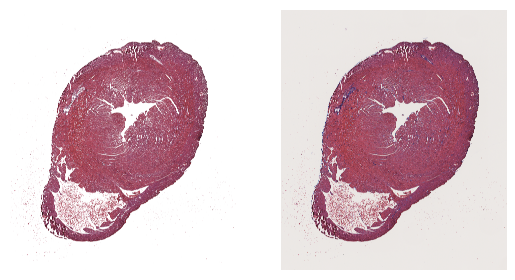

In [51]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img_red)#, cmap='gray')
ax[1].imshow(np_rgb)

# Remove axes for cleaner display
for a in ax.flatten():
    a.axis('off')
    
plt.savefig("Test Trichrome Red Output.png", dpi=5000)
print("File Saved!")
plt.show()

In [3]:
def trim_after_char(text, char):
    index = text.rindex(char)
    if index != -1:
        return text[index+1:]
    return text

def calculate_contour_area(contour):
    x = contour[:, 1]  # X-coordinates
    y = contour[:, 0]  # Y-coordinates
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

for img in img_files:
    img_slide = OpenSlide(img)
    print("Slide - "+trim_after_char(img, "\\")+" - Loaded")
    
    location = (0, 0)
    level = img_slide.level_count-1
    size = img_slide.level_dimensions[level]
    region = img_slide.read_region(location, level, size)

    np_region = np.asarray(region)
    np_rgb = np_region[:, :, :3]
    np_gray = ski.color.rgb2gray(np_rgb)
    contours = ski.measure.find_contours(np_gray)
    # Calculate areas for all contours
    areas = [calculate_contour_area(contour) for contour in contours]
    largest_indices = heapq.nlargest(3, range(len(areas)), key=lambda i: areas[i])

    coordinates = []
    for index in largest_indices:
        # Calculate the bounding box
        x_min, x_max = np.min(contours[index][:, 1])-10, np.max(contours[index][:, 1])+10
        y_min, y_max = np.min(contours[index][:, 0])-10, np.max(contours[index][:, 0])+10
        
        location = (x_min, y_min)
        size = (x_max-x_min, y_max-y_min)
        coordinates.append([location, size])

    downsample_factor = img_slide.level_downsamples[level]
    higher_bounding_boxes = []
    
    for box in coordinates:
        bigger_box = []
        for coord in box:
            new_box = (int(downsample_factor*coord[0]), int(downsample_factor*coord[1]))
            bigger_box.append(new_box)
        higher_bounding_boxes.append(bigger_box)

    
    lower_hue = 0.5 #121/255
    lower_sat = 25/255 #20/255
    lower_bri = 20/255 #10/255
    upper_hue = 0.7 #179/255
    upper_sat = 1
    upper_bri = 1

    lower_bound = np.array([lower_hue, lower_sat, lower_bri])
    upper_bound = np.array([upper_hue, upper_sat, upper_bri])

    for i, boxes in enumerate(higher_bounding_boxes):
        highest_region = img_slide.read_region(boxes[0], 0, boxes[1])
        np_region = np.asarray(highest_region)
        np_rgb = np_region[:, :, :3]
    
        img_hsv = ski.color.rgb2hsv(np_rgb)

        img_mask = np.all((img_hsv >= lower_bound) & (img_hsv <= upper_bound), axis=-1)
        binary_mask = np.zeros_like(np_rgb[:, :, 0])
        binary_mask[img_mask] = 255

        fig, ax = plt.subplots()
        ax.axis('off')
        plt.imshow(binary_mask, cmap="Blues")
        plt.savefig(trim_after_char(img, "\\")+" Heart - "+str(i+1)+".png", dpi=5000)
        plt.close()
        print("File Generated!")

Slide - GL25_001_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File Generated!
Slide - GL25_002_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File Generated!
Slide - GL25_003_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File Generated!
Slide - GL25_004_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File Generated!
Slide - GL25_006_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File Generated!
Slide - GL25_007_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File Generated!
Slide - GL25_008_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File Generated!
Slide - GL25_014_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File Generated!
Slide - GL25_015_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File Generated!
Slide - GL25_022_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File Generated!
Slide - GL25_023_B3_Trichrome.ndpi - Loaded
File Generated!
File Generated!
File

In [24]:
plt.close('all')

In [27]:
print(img_slide.dimensions)
print(img_slide.level_count)
print(img_slide.level_dimensions)
for prop in dict(img_slide.properties):
    print(prop+" - "+dict(img_slide.properties)[prop])
print(f"file size: {round(os.path.getsize(img_current) / 1024 ** 2, 2)} MB")

(96000, 28160)
8
((96000, 28160), (48000, 14080), (24000, 7040), (12000, 3520), (6000, 1760), (3000, 880), (1500, 440), (750, 220))
hamamatsu.AHEX[0] - 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
hamamatsu.AHEX[0].fluorescence - 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
hamamatsu.AHEX[0].ploidy - 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
hamamatsu.AHEX[1] - 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000